<a href="https://colab.research.google.com/github/borisquince/Springboard/blob/master/Copy_of_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt

In [0]:
#pull the data into a pandas data frame
#etoro= pd.read_csv(r'C:\Users\admin\Desktop\etoro_work_final.csv',encoding='latin-1')
url = 'https://raw.githubusercontent.com/borisquince/Springboard/master/Data%20Cleaning%20%26%20Wrangling/etoro_work_final.csv?_sm_au_=iVVntsHFrs15PDwN'
etoro = pd.read_csv(url,encoding='latin-1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,15,109) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
etoro.head()

,id,name,url,max_drawdown_weekly,max_drawdown_daily,max_drawdown_yearly,copiers,total_trades,avg_profit,avg_loss,trades_per_week,avg_holding_time,active_since,profitable_weeks,profitable_percent,average_risk_score,aum_range,stat_total2019,stat_dec2019,stat_nov2019,stat_oct2019,stat_sep2019,stat_aug2019,stat_jul2019,stat_jun2019,stat_may2019,stat_apr2019,stat_mar2019,stat_feb2019,stat_jan2019,stat_total2018,stat_dec2018,stat_nov2018,stat_oct2018,stat_sep2018,stat_aug2018,stat_jul2018,stat_jun2018,stat_may2018,stat_apr2018,stat_mar2018,stat_feb2018,stat_jan2018,stat_total2017,stat_dec2017,stat_nov2017,stat_oct2017,stat_sep2017,stat_aug2017,stat_jul2017,stat_jun2017,stat_may2017,stat_apr2017,stat_mar2017,stat_feb2017,stat_jan2017,stat_total2016,stat_dec2016,stat_nov2016,stat_oct2016,stat_sep2016,stat_aug2016,stat_jul2016,stat_jun2016,stat_may2016,stat_apr2016,stat_mar2016,stat_feb2016,stat_jan2016,stat_total2015,stat_dec2015,stat_nov2015,stat_oct2015,stat_sep2015,stat_aug2015,stat_jul2015,stat_jun2015,stat_may2015,stat_apr2015,stat_mar2015,stat_feb2015,stat_jan2015,stat_total2014,stat_dec2014,stat_nov2014,stat_oct2014,stat_sep2014,stat_aug2014,stat_jul2014,stat_jun2014,stat_may2014,stat_apr2014,stat_mar2014,stat_feb2014,stat_jan2014,stat_total2013,stat_dec2013,stat_nov2013,stat_oct2013,stat_sep2013,stat_aug2013,stat_jul2013,stat_jun2013,stat_may2013,stat_apr2013,stat_mar2013,stat_feb2013,stat_jan2013,country,Unnamed: 109
0,1,DONMASAITI,https://www.etoro.com/people/doforextraderug/s...,-2%,-1%,-8%,0,3,115%,-14%,0.04,71.5 Months,16/05/2011,52%,67%,2,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9,-0.71,1.83,-4.22,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,5.79,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UGANDA,NaN
1,2,Mahoganyman,https://www.etoro.com/people/doforextraderug/s...,-2%,-1%,-8%,0,3,115%,-14%,0.04,71.5 Months,16/05/2011,52%,67%,2,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9,-0.71,1.83,-4.22,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,5.79,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UGANDA,NaN
2,3,artaxexes1,https://www.etoro.com/people/doforextraderug/s...,-2%,-1%,-8%,0,3,115%,-14%,0.04,71.5 Months,16/05/2011,52%,67%,2,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9,-0.71,1.83,-4.22,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,5.79,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,konraad,https://www.etoro.com/people/doforextraderug/s...,-2%,-1%,-8%,0,3,115%,-14%,0.04,71.5 Months,16/05/2011,52%,67%,2,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9,-0.71,1.83,-4.22,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,5.79,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UGANDA,NaN
4,5,lanezimbo,https://www.etoro.com/people/lanezimbo/stats,-38%,-22%,-58%,0,6,6%,-14%,0.2,1 Month,16/02/2016,70%,33%,0,NaN,9.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,9.58,-50.20,-6.66,4.16,-17.65,4.29,5.19,-4.84,-40.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,47.28,0.0,0.0,3.31,7.44,3.74,-3.28,-1.9,7.63,-5.8,32.2,

In [0]:
#slicer111= etoro['average_risk_score']==0
#etoro[slicer111].count()

# checking info

In [0]:
etoro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Columns: 110 entries, id to Unnamed: 109
dtypes: float64(91), int64(3), object(16)
memory usage: 55.0+ MB


In [0]:
# Clients with 'aum_range' not null ( implying they have at least one investor copying them )
#'aum_range' is the total amount of money that has been allocated to copying that particular client by various investors 
etoro_range = etoro['aum_range'].notnull()
etoro[etoro_range][['aum_range','copiers']]
etoro[etoro_range][['aum_range','copiers']].head()

,aum_range,copiers
181,<$50K,4
270,<$50K,1
341,<$50K,2
485,<$50K,1
495,<$50K,6


In [0]:
# Lets check how many elements we have
print(etoro[etoro_range][['aum_range','copiers']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 181 to 65520
Data columns (total 2 columns):
aum_range    2053 non-null object
copiers      2053 non-null int64
dtypes: int64(1), object(1)
memory usage: 48.1+ KB
None


In [0]:
# Pulls the rows with copiers > 0
etoro_range_2 = etoro['copiers'] > 0
etoro[etoro_range_2][['aum_range','copiers']].head()

,aum_range,copiers
181,<$50K,4
270,<$50K,1
341,<$50K,2
485,<$50K,1
495,<$50K,6


In [0]:
# Lets check the info to see if it matches with etoro_range above
print(etoro[etoro_range][['aum_range','copiers']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 181 to 65520
Data columns (total 2 columns):
aum_range    2053 non-null object
copiers      2053 non-null int64
dtypes: int64(1), object(1)
memory usage: 48.1+ KB
None


In [0]:
# Let's define t2 as the data set with all null elements replaced with a zero
t2 = etoro.fillna(0)
t2.head()

,id,name,url,max_drawdown_weekly,max_drawdown_daily,max_drawdown_yearly,copiers,total_trades,avg_profit,avg_loss,trades_per_week,avg_holding_time,active_since,profitable_weeks,profitable_percent,average_risk_score,aum_range,stat_total2019,stat_dec2019,stat_nov2019,stat_oct2019,stat_sep2019,stat_aug2019,stat_jul2019,stat_jun2019,stat_may2019,stat_apr2019,stat_mar2019,stat_feb2019,stat_jan2019,stat_total2018,stat_dec2018,stat_nov2018,stat_oct2018,stat_sep2018,stat_aug2018,stat_jul2018,stat_jun2018,stat_may2018,stat_apr2018,stat_mar2018,stat_feb2018,stat_jan2018,stat_total2017,stat_dec2017,stat_nov2017,stat_oct2017,stat_sep2017,stat_aug2017,stat_jul2017,stat_jun2017,stat_may2017,stat_apr2017,stat_mar2017,stat_feb2017,stat_jan2017,stat_total2016,stat_dec2016,stat_nov2016,stat_oct2016,stat_sep2016,stat_aug2016,stat_jul2016,stat_jun2016,stat_may2016,stat_apr2016,stat_mar2016,stat_feb2016,stat_jan2016,stat_total2015,stat_dec2015,stat_nov2015,stat_oct2015,stat_sep2015,stat_aug2015,stat_jul2015,stat_jun2015,stat_may2015,stat_apr2015,stat_mar2015,stat_feb2015,stat_jan2015,stat_total2014,stat_dec2014,stat_nov2014,stat_oct2014,stat_sep2014,stat_aug2014,stat_jul2014,stat_jun2014,stat_may2014,stat_apr2014,stat_mar2014,stat_feb2014,stat_jan2014,stat_total2013,stat_dec2013,stat_nov2013,stat_oct2013,stat_sep2013,stat_aug2013,stat_jul2013,stat_jun2013,stat_may2013,stat_apr2013,stat_mar2013,stat_feb2013,stat_jan2013,country,Unnamed: 109
0,1,DONMASAITI,https://www.etoro.com/people/doforextraderug/s...,-2%,-1%,-8%,0,3,115%,-14%,0.04,71.5 Months,16/05/2011,52%,67%,2,0,3.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,-0.71,1.83,-4.22,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,5.79,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UGANDA,0
1,2,Mahoganyman,https://www.etoro.com/people/doforextraderug/s...,-2%,-1%,-8%,0,3,115%,-14%,0.04,71.5 Months,16/05/2011,52%,67%,2,0,3.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,-0.71,1.83,-4.22,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,5.79,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UGANDA,0
2,3,artaxexes1,https://www.etoro.com/people/doforextraderug/s...,-2%,-1%,-8%,0,3,115%,-14%,0.04,71.5 Months,16/05/2011,52%,67%,2,0,3.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,-0.71,1.83,-4.22,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,5.79,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,4,konraad,https://www.etoro.com/people/doforextraderug/s...,-2%,-1%,-8%,0,3,115%,-14%,0.04,71.5 Months,16/05/2011,52%,67%,2,0,3.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,-0.71,1.83,-4.22,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,5.79,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UGANDA,0
4,5,lanezimbo,https://www.etoro.com/people/lanezimbo/stats,-38%,-22%,-58%,0,6,6%,-14%,0.2,1 Month,16/02/2016,70%,33%,0,0,9.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9.58,-50.20,-6.66,4.16,-17.65,4.29,5.19,-4.84,-40.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,47.28,0.0,0.0,3.31,7.44,3.74,-3.28,-1.9,7.63,-5

In [0]:
#Extract only the return columns
returns = t2.iloc[:,17:107]

In [0]:
returns.head()

,stat_total2019,stat_dec2019,stat_nov2019,stat_oct2019,stat_sep2019,stat_aug2019,stat_jul2019,stat_jun2019,stat_may2019,stat_apr2019,stat_mar2019,stat_feb2019,stat_jan2019,stat_total2018,stat_dec2018,stat_nov2018,stat_oct2018,stat_sep2018,stat_aug2018,stat_jul2018,stat_jun2018,stat_may2018,stat_apr2018,stat_mar2018,stat_feb2018,stat_jan2018,stat_total2017,stat_dec2017,stat_nov2017,stat_oct2017,stat_sep2017,stat_aug2017,stat_jul2017,stat_jun2017,stat_may2017,stat_apr2017,stat_mar2017,stat_feb2017,stat_jan2017,stat_total2016,stat_dec2016,stat_nov2016,stat_oct2016,stat_sep2016,stat_aug2016,stat_jul2016,stat_jun2016,stat_may2016,stat_apr2016,stat_mar2016,stat_feb2016,stat_jan2016,stat_total2015,stat_dec2015,stat_nov2015,stat_oct2015,stat_sep2015,stat_aug2015,stat_jul2015,stat_jun2015,stat_may2015,stat_apr2015,stat_mar2015,stat_feb2015,stat_jan2015,stat_total2014,stat_dec2014,stat_nov2014,stat_oct2014,stat_sep2014,stat_aug2014,stat_jul2014,stat_jun2014,stat_may2014,stat_apr2014,stat_mar2014,stat_feb2014,stat_jan2014,stat_total2013,stat_dec2013,stat_nov2013,stat_oct2013,stat_sep2013,stat_aug2013,stat_jul2013,stat_jun2013,stat_may2013,stat_apr2013,stat_mar2013,stat_feb2013
0,3.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,-0.71,1.83,-4.22,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,5.79,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,-0.71,1.83,-4.22,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,5.79,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,-0.71,1.83,-4.22,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,5.79,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,-0.71,1.83,-4.22,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,5.79,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9.58,-50.20,-6.66,4.16,-17.65,4.29,5.19,-4.84,-40.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,47.28,0.0,0.0,3.31,7.44,3.74,-3.28,-1.9,7.63,-5.8,32.2,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# Define col_drop which consists of the yearly return columns
col_drop = ['stat_total2019','stat_total2018','stat_total2017','stat_total2016','stat_total2015','stat_total2014','stat_total2013']

In [0]:
#remove the yearly returns from the data frame
returns.drop(columns = col_drop)
returns.drop(columns = col_drop).head()

,stat_dec2019,stat_nov2019,stat_oct2019,stat_sep2019,stat_aug2019,stat_jul2019,stat_jun2019,stat_may2019,stat_apr2019,stat_mar2019,stat_feb2019,stat_jan2019,stat_dec2018,stat_nov2018,stat_oct2018,stat_sep2018,stat_aug2018,stat_jul2018,stat_jun2018,stat_may2018,stat_apr2018,stat_mar2018,stat_feb2018,stat_jan2018,stat_dec2017,stat_nov2017,stat_oct2017,stat_sep2017,stat_aug2017,stat_jul2017,stat_jun2017,stat_may2017,stat_apr2017,stat_mar2017,stat_feb2017,stat_jan2017,stat_dec2016,stat_nov2016,stat_oct2016,stat_sep2016,stat_aug2016,stat_jul2016,stat_jun2016,stat_may2016,stat_apr2016,stat_mar2016,stat_feb2016,stat_jan2016,stat_dec2015,stat_nov2015,stat_oct2015,stat_sep2015,stat_aug2015,stat_jul2015,stat_jun2015,stat_may2015,stat_apr2015,stat_mar2015,stat_feb2015,stat_jan2015,stat_dec2014,stat_nov2014,stat_oct2014,stat_sep2014,stat_aug2014,stat_jul2014,stat_jun2014,stat_may2014,stat_apr2014,stat_mar2014,stat_feb2014,stat_jan2014,stat_dec2013,stat_nov2013,stat_oct2013,stat_sep2013,stat_aug2013,stat_jul2013,stat_jun2013,stat_may2013,stat_apr2013,stat_mar2013,stat_feb2013
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,-0.71,1.83,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,-0.71,1.83,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,-0.71,1.83,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,-0.71,1.83,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9.58,-6.66,4.16,-17.65,4.29,5.19,-4.84,-40.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,3.31,7.44,3.74,-3.28,-1.9,7.63,-5.8,32.2,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
returns.

In [0]:
#Define returns2 which is a list of each traders return as a list
returns2 = returns.values.tolist()

In [0]:
#Since each trader may have joined at different times, lets have a string of constant trades since joining
returns2_trimmed = [np.trim_zeros(i) for i in returns2]

In [0]:
#Convert to a data frame
returns2_trimmed = pd.DataFrame(returns2_trimmed)
returns2_trimmed['test'] = 1
returns2_trimmed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,test
0,3.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,-0.71,1.83,-4.22,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,5.79,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,3.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,-0.71,1.83,-4.22,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,5.79,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,-0.71,1.83,-4.22,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,5.79,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,-0.71,1.83,-4.22,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,5.79,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,9.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9.58,-50.20,-6.66,4.16,-17.65,4.29,5.19,-4.84,-40.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,47.28,0.0,0.0,3.31,7.44,3.74,-3.28,-1.9,7.63,-5.8,32.2,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [0]:
#create a constant flow of returns


The three year return is calculated by getting the average of the total return for 2019, 2018, and 2017

In [0]:
# create a column three_year_return (Display result)
t2['three_year_return'] = ((t2['stat_total2019']) +  (t2['stat_total2018']) + (t2['stat_total2017']))/3
t2[['stat_total2019','stat_total2018','stat_total2017','three_year_return']].head(30)
t2.head()

,id,name,url,max_drawdown_weekly,max_drawdown_daily,max_drawdown_yearly,copiers,total_trades,avg_profit,avg_loss,trades_per_week,avg_holding_time,active_since,profitable_weeks,profitable_percent,average_risk_score,aum_range,stat_total2019,stat_dec2019,stat_nov2019,stat_oct2019,stat_sep2019,stat_aug2019,stat_jul2019,stat_jun2019,stat_may2019,stat_apr2019,stat_mar2019,stat_feb2019,stat_jan2019,stat_total2018,stat_dec2018,stat_nov2018,stat_oct2018,stat_sep2018,stat_aug2018,stat_jul2018,stat_jun2018,stat_may2018,stat_apr2018,stat_mar2018,stat_feb2018,stat_jan2018,stat_total2017,stat_dec2017,stat_nov2017,stat_oct2017,stat_sep2017,stat_aug2017,stat_jul2017,stat_jun2017,stat_may2017,stat_apr2017,stat_mar2017,stat_feb2017,stat_jan2017,stat_total2016,stat_dec2016,stat_nov2016,stat_oct2016,stat_sep2016,stat_aug2016,stat_jul2016,stat_jun2016,stat_may2016,stat_apr2016,stat_mar2016,stat_feb2016,stat_jan2016,stat_total2015,stat_dec2015,stat_nov2015,stat_oct2015,stat_sep2015,stat_aug2015,stat_jul2015,stat_jun2015,stat_may2015,stat_apr2015,stat_mar2015,stat_feb2015,stat_jan2015,stat_total2014,stat_dec2014,stat_nov2014,stat_oct2014,stat_sep2014,stat_aug2014,stat_jul2014,stat_jun2014,stat_may2014,stat_apr2014,stat_mar2014,stat_feb2014,stat_jan2014,stat_total2013,stat_dec2013,stat_nov2013,stat_oct2013,stat_sep2013,stat_aug2013,stat_jul2013,stat_jun2013,stat_may2013,stat_apr2013,stat_mar2013,stat_feb2013,stat_jan2013,country,Unnamed: 109,three_year_return
0,1,DONMASAITI,https://www.etoro.com/people/doforextraderug/s...,-2%,-1%,-8%,0,3,115%,-14%,0.04,71.5 Months,16/05/2011,52%,67%,2,0,3.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,-0.71,1.83,-4.22,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,5.79,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UGANDA,0,1.533333
1,2,Mahoganyman,https://www.etoro.com/people/doforextraderug/s...,-2%,-1%,-8%,0,3,115%,-14%,0.04,71.5 Months,16/05/2011,52%,67%,2,0,3.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,-0.71,1.83,-4.22,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,5.79,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UGANDA,0,1.533333
2,3,artaxexes1,https://www.etoro.com/people/doforextraderug/s...,-2%,-1%,-8%,0,3,115%,-14%,0.04,71.5 Months,16/05/2011,52%,67%,2,0,3.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,-0.71,1.83,-4.22,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,5.79,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.533333
3,4,konraad,https://www.etoro.com/people/doforextraderug/s...,-2%,-1%,-8%,0,3,115%,-14%,0.04,71.5 Months,16/05/2011,52%,67%,2,0,3.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,-0.71,1.83,-4.22,-2.29,-2.81,-1.49,-0.70,1.67,0.59,-0.69,1.97,-0.35,-1.19,0.18,0.92,5.79,0.04,0.27,1.47,-0.44,1.08,0.46,-1.04,1.14,0.75,0.44,0.92,0.57,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UGANDA,0,1.533333
4,5,lanezimbo,https://www.etoro.com/people/lanezimbo/stats,-38%,-22%,-58%,0,6,6%,-14%,0.2,1 Month,16/02/2016,70%,33%,0,0,9.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9.58,-50.20,-6.66,4.16,-17.65,4.29,5.19,-4.84,-40.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

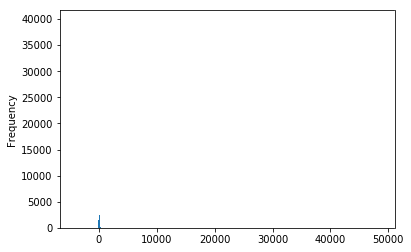

In [0]:
# The histogram below shows that the data is widely distributed so we need to narrow it down and get rid of the ouliers
t2['three_year_return'].plot(kind='hist', bins=1000)
plt.show()

In [0]:
# lets define return_all as a dataframe with the yearly returns for the data
return_all = t2[['stat_total2019','stat_total2018','stat_total2017','three_year_return']]
return_all 

,stat_total2019,stat_total2018,stat_total2017,three_year_return
0,3.03,-4.22,5.79,1.533333
1,3.03,-4.22,5.79,1.533333
2,3.03,-4.22,5.79,1.533333
3,3.03,-4.22,5.79,1.533333
4,9.58,-50.20,0.00,-13.540000
5,6.22,-86.78,-2.43,-27.663333
6,-13.59,-92.28,0.00,-35.290000
7,-6.94,-95.31,166.25,21.333333
8,-12.94,-92.52,39.06,-22.133333
9,-6.19,-84.64,8.03,-27.600000


In [0]:
# now lets narrow down the data till we find where most observations lie
slice1 = return_all['three_year_return'] > 500
return_all[slice1]

,stat_total2019,stat_total2018,stat_total2017,three_year_return
995,-2.36,-74.27,2450.36,791.243333
1090,0.00,-100.00,3991.87,1297.290000
1285,0.00,-85.05,4726.91,1547.286667
1379,6.76,-91.76,2046.40,653.800000
1604,28.41,-90.44,2728.07,888.680000
1729,7.36,-86.67,2101.31,674.000000
1771,101.69,-7.82,2282.93,792.266667
1864,-4.24,-76.72,6732.76,2217.266667
1868,9.62,-84.06,1632.23,519.263333
1883,-9.84,-73.56,2339.50,752.033333


In [0]:
# how many observations are above 500
return_all[slice1].count()

stat_total2019       135
stat_total2018       135
stat_total2017       135
three_year_return    135
dtype: int64

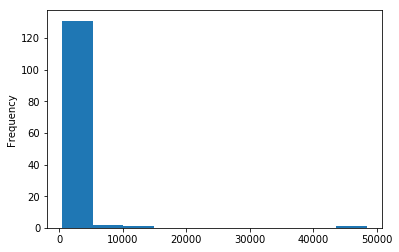

In [0]:
return_all[slice1]['three_year_return'].plot(kind='hist')
plt.show()

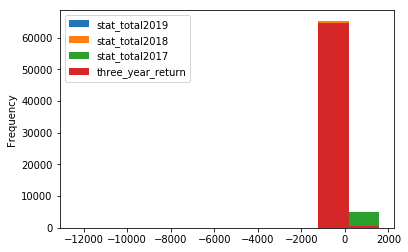

In [0]:
# Let's plot those below 500
slice2 = return_all['three_year_return'] < 500
return_all[slice2].plot(kind='hist')
plt.show()

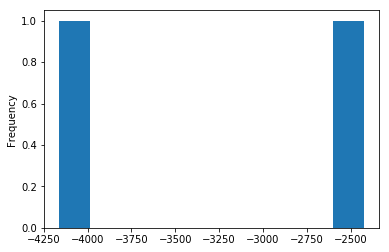

In [0]:
# We still have several outliers below -2000
slice3 = return_all['three_year_return'] < -2000
return_all[slice3]['three_year_return'].plot(kind='hist')
plt.show()

In [0]:
return_all[slice3].count()

stat_total2019       2
stat_total2018       2
stat_total2017       2
three_year_return    2
dtype: int64

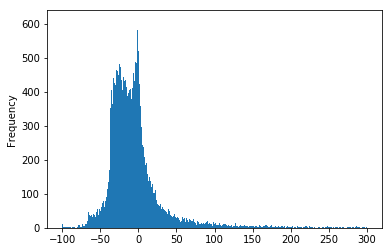

In [0]:
# between -100 and 300
slice3 = (return_all['three_year_return'] > -100) & (return_all['three_year_return'] < 300)
return_all[slice3]['three_year_return'].plot(kind='hist', bins=1000)
plt.show()

In [0]:
# How many do we have between -100 and 300
return_all[slice3]['three_year_return'].count()

65217

In [0]:
# Therefore we have only 291 investors < 100 or >300

In [0]:
# Lets measure the correlation between key terms 

In [0]:
# Convert t2 into numeric and remove the two elements which where erroneously pulled
t2['trades_per_week'] = pd.to_numeric(t2['trades_per_week'],errors='coerce')
t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Columns: 111 entries, id to three_year_return
dtypes: float64(93), int64(3), object(15)
memory usage: 55.5+ MB


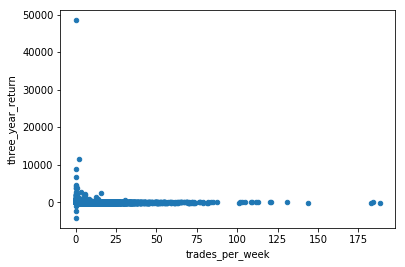

In [0]:
# let's scatter trades per week against the return
t2.plot.scatter(x='trades_per_week', y='three_year_return')
plt.show()

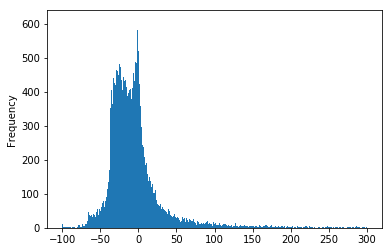

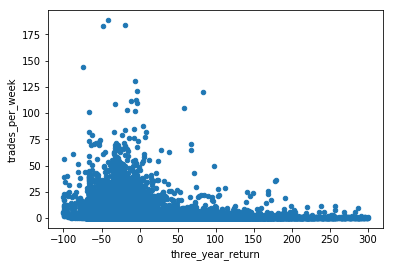

In [0]:
# to make it clearer, lets slice the data to only < 300 and > -100 
slice3 = (t2['three_year_return'] > -100) & (t2['three_year_return'] < 300)
t2[slice3]['three_year_return'].plot(kind='hist', bins=1000)

real22 = t2[slice3][['three_year_return','trades_per_week', 'average_risk_score']]
real22


real22.plot.scatter(x='three_year_return', y='trades_per_week')
plt.show()

In [0]:
# Lets convert the average risk score to numeric
real22['average_risk_score'] = pd.to_numeric(real22['average_risk_score'],errors='coerce')

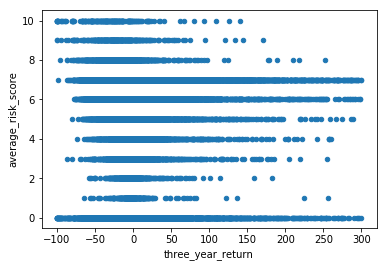

In [0]:
# let's scatter average_risk_score against the return
real22.plot.scatter(x='three_year_return', y='average_risk_score')
plt.show()


In [0]:
etoro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Columns: 110 entries, id to Unnamed: 109
dtypes: float64(91), int64(3), object(16)
memory usage: 55.0+ MB


In [0]:
etoro['copiers'].head()

0    0
1    0
2    0
3    0
4    0
Name: copiers, dtype: int64

In [0]:
etoro.head()

NameError: ignored

In [0]:
# lets explore the data by country
by_country = etoro.groupby('country')

In [0]:
# finding how many investors we have by country
number_in_data = by_country['name'].count()
number_in_data = number_in_data.sort_values(ascending=False)
number_in_data.head()

country
SWITZERLAND    4425
GERMANY        3969
DENMARK        3618
NETHERLANDS    3440
AUSTRALIA      2333
Name: name, dtype: int64

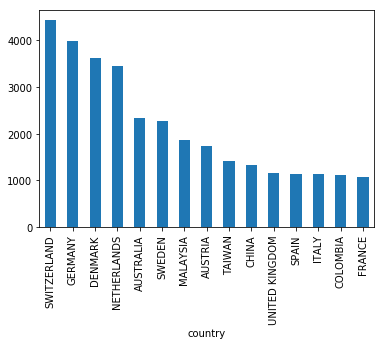

In [0]:
number_in_data.head(15).plot(kind='bar')

In [0]:
copiers = by_country['copiers'].count()
copiers.nlargest(5)

country
SWITZERLAND    4425
GERMANY        3969
DENMARK        3618
NETHERLANDS    3440
AUSTRALIA      2333
Name: copiers, dtype: int64

In [0]:
etoro_copiers_greater_than_zero = etoro[etoro['copiers']>0]
etoro_copiers_greater_than_zero.head()

,id,name,url,max_drawdown_weekly,max_drawdown_daily,max_drawdown_yearly,copiers,total_trades,avg_profit,avg_loss,trades_per_week,avg_holding_time,active_since,profitable_weeks,profitable_percent,average_risk_score,aum_range,stat_total2019,stat_dec2019,stat_nov2019,stat_oct2019,stat_sep2019,stat_aug2019,stat_jul2019,stat_jun2019,stat_may2019,stat_apr2019,stat_mar2019,stat_feb2019,stat_jan2019,stat_total2018,stat_dec2018,stat_nov2018,stat_oct2018,stat_sep2018,stat_aug2018,stat_jul2018,stat_jun2018,stat_may2018,stat_apr2018,stat_mar2018,stat_feb2018,stat_jan2018,stat_total2017,stat_dec2017,stat_nov2017,stat_oct2017,stat_sep2017,stat_aug2017,stat_jul2017,stat_jun2017,stat_may2017,stat_apr2017,stat_mar2017,stat_feb2017,stat_jan2017,stat_total2016,stat_dec2016,stat_nov2016,stat_oct2016,stat_sep2016,stat_aug2016,stat_jul2016,stat_jun2016,stat_may2016,stat_apr2016,stat_mar2016,stat_feb2016,stat_jan2016,stat_total2015,stat_dec2015,stat_nov2015,stat_oct2015,stat_sep2015,stat_aug2015,stat_jul2015,stat_jun2015,stat_may2015,stat_apr2015,stat_mar2015,stat_feb2015,stat_jan2015,stat_total2014,stat_dec2014,stat_nov2014,stat_oct2014,stat_sep2014,stat_aug2014,stat_jul2014,stat_jun2014,stat_may2014,stat_apr2014,stat_mar2014,stat_feb2014,stat_jan2014,stat_total2013,stat_dec2013,stat_nov2013,stat_oct2013,stat_sep2013,stat_aug2013,stat_jul2013,stat_jun2013,stat_may2013,stat_apr2013,stat_mar2013,stat_feb2013,stat_jan2013,country,Unnamed: 109
181,182,huyb1991,https://www.etoro.com/people/huyb1991/stats,-46%,-39%,-82%,4,1145,3%,-12%,20.45,6.5 Days,3/3/2016,41%,69%,6,<$50K,2.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.36,7.03,-5.70,-77.64,0.38,-38.04,-21.51,2.26,-12.58,-12.06,-6.95,-10.12,30.23,-47.02,-8.93,10.85,307.17,0.77,25.21,29.91,34.96,19.78,9.18,28.13,27.32,42.32,-9.19,-47.91,28.15,-86.13,5.66,-18.76,-32.37,15.5,25.45,-19.92,12.26,-36.24,-67.75,-10.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,271,tieuphongna,https://www.etoro.com/people/tieuphongna/stats,-43%,-23%,-93%,1,341,10%,-20%,6.09,2 Weeks,7/12/2017,34%,44%,7,<$50K,-10.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.97,8.31,-11.34,-88.71,-25.03,-56.00,-46.30,-20.44,4.85,1.07,-17.37,-8.55,35.68,-47.67,77.07,-20.39,31.10,31.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VIETNAM,NaN
341,342,Yoabnart,https://www.etoro.com/people/Yoabnart/stats,-30%,-18%,-77%,2,24,0%,-84%,0.43,15.5 Months,7/12/2017,38%,0%,7,<$50K,-10.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.31,2.26,-14.00,-84.92,-3.40,-22.65,-24.36,84.72,-25.57,-8.09,-25.08,-26.97,69.86,-45.58,-21.68,-46.68,93.63,93.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VIETNAM,NaN
485,486,roublardman,https://www.etoro.com/people/roublardman/stats,-9%,-7%,-23%,1,127,4%,-14%,2.95,1 Month,3/1/2017,54%,65%,0,<$50K,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,-2.46,-3.82,-5.08,-7.35,-1.45,0.30,-1.41,-0.49,1.89,0.25,-4.29,7.42,13.24,70.67,-0.96,-0.29,3.03,0.26,9.75,0.16,1.75,-0.55,5.03,11.70,2.97,24.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VIETNAM,NaN
495,496,vnsmartvision,https://www.etoro.com/people/vnsmartvision/stats,-9%,-9%,-14%,6,110,15%,-24%,4.12,5 Days,26/09/2018,62%,69%,8,<$50K,27.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.43,17.93,17.83,-5.42,-5.34,0.50,-0.50,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [0]:
by_country_copiers_greater_than_zero = etoro_copiers_greater_than_zero.groupby('country')
copiers_count = by_country_copiers_greater_than_zero['copiers'].count()
copiers_count.head()

country
ARGENTINA      1
ARMENIA        1
AUSTRALIA     43
AUSTRIA       35
AZERBAIJAN     2
Name: copiers, dtype: int64

In [0]:
copiers_count = copiers_count.sort_values(ascending=False)
copiers_count.head()


country
UNITED KINGDOM    324
ITALY             217
GERMANY           167
FRANCE            120
SPAIN              94
Name: copiers, dtype: int64

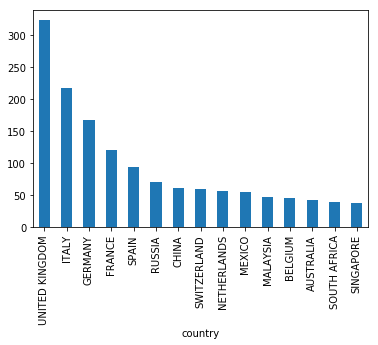

In [0]:
copiers_count.head(15).plot(kind='bar')